In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("house-prices.csv")

In [4]:
df.head(3)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East


In [5]:
df[['Brick','Neighborhood']].nunique()

Brick           2
Neighborhood    3
dtype: int64

#Encoding

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
Re= OrdinalEncoder()

In [8]:
Re.fit(df[["Brick"]])

OrdinalEncoder()

In [9]:
df["Brick"]=Re.transform(df[["Brick"]])

In [10]:
Re.fit(df[["Neighborhood"]])

OrdinalEncoder()

In [11]:
df["Neighborhood"]=Re.transform(df[["Neighborhood"]])

In [12]:
df.head(3)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,0.0,0.0
1,2,114200,2030,4,2,3,0.0,0.0
2,3,114800,1740,3,2,1,0.0,0.0


In [13]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125,0.328125,0.953125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324,0.471376,0.811913
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000,0.000000,0.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000,0.000000,0.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000,0.000000,1.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000,1.000000,2.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000,1.000000,2.000000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

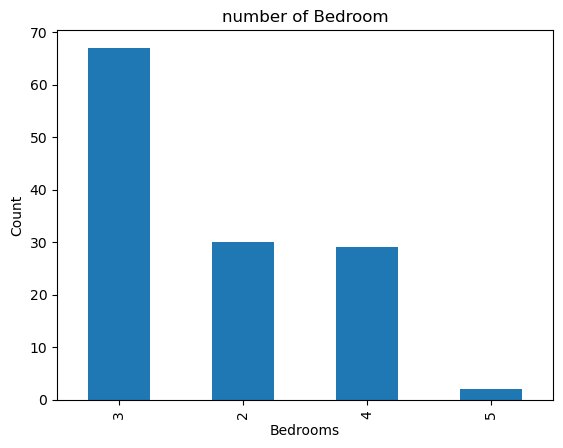

In [14]:
df['Bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

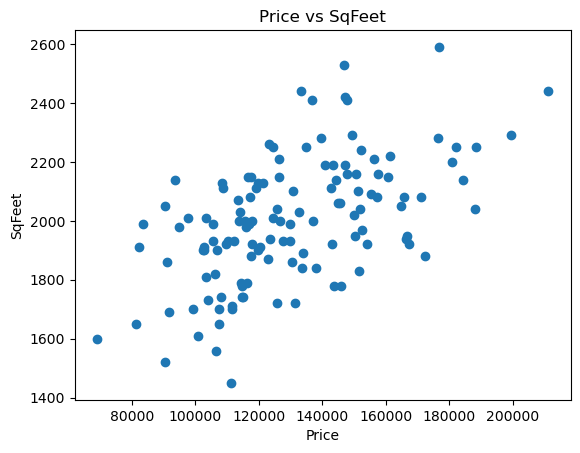

In [15]:
plt.scatter(df.Price,df.SqFt)
plt.title("Price vs SqFeet")
plt.xlabel("Price")
plt.ylabel("SqFeet")
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

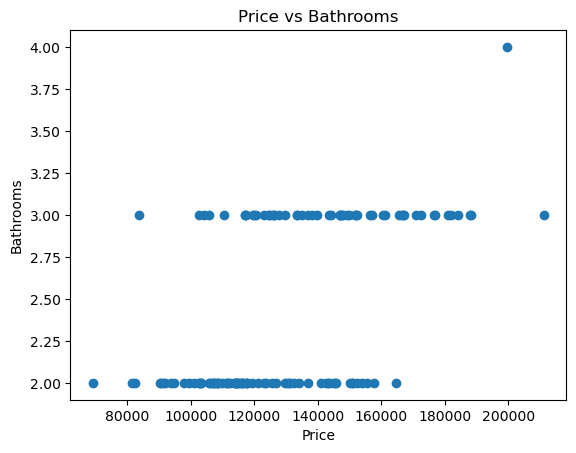

In [16]:
plt.scatter(df.Price,df.Bathrooms)
plt.title("Price vs Bathrooms")
plt.xlabel("Price")
plt.ylabel("Bathrooms")
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

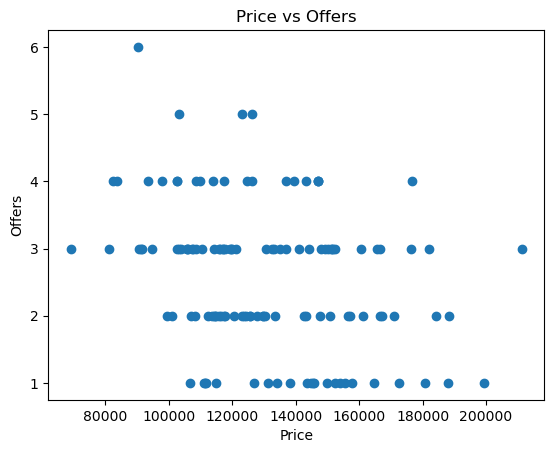

In [17]:
plt.scatter(df.Price,df.Offers)
plt.title("Price vs Offers")
plt.xlabel("Price")
plt.ylabel("Offers")
sns.despine

In [18]:
X = df.iloc[:,2:]
y= df["Price"]

In [19]:
from sklearn.model_selection import train_test_split

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.10, random_state= 2)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr= LinearRegression()

In [34]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
lr.score(X_test,y_test)

0.8827035387157661

In [37]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 4, min_samples_split = 2,learning_rate = 0.2, loss= 'squared_error')

In [38]:
clf.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=400)

In [39]:
clf.score(X_test,y_test)

0.9120665038932442

In [40]:
y_pred = clf.predict(X_test[0:1])
y_pred

array([142942.63048879])

In [41]:
y_pred2 =clf.predict(X_test[0:5])
y_pred2

array([142942.63048879, 108095.76272277,  90249.78710104, 106731.08551958,
       177860.14539146])

In [42]:
clf.predict(X_test)

array([142942.63048879, 108095.76272277,  90249.78710104, 106731.08551958,
       177860.14539146, 158252.76235904, 121390.74498353, 104523.43340875,
       167936.20546037, 157936.90959946, 112208.76916022, 123129.11028993,
        93519.47270934])